In [7]:
from plotnine.data import txhousing
df = txhousing

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

try:
    data = txhousing

    if data is not None:  
        selected_features = ['volume', 'median', 'listings', 'inventory']
        data['date'] = pd.to_datetime(data['date'])
        data['year'] = data['date'].dt.year
        data['month'] = data['date'].dt.month
        selected_features.extend(['year', 'month'])

        X = data[selected_features]
        y = data['sales']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(),
            'Gradient Boosting': GradientBoostingRegressor()
        }

        for name, model in models.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, predictions)

            print(f"Model: {name}")
            print(f"MSE: {mse}")
            print(f"RMSE: {rmse}")
            print(f"R-squared: {r2}")
            print("---------")
    else:
        print("Error: Data not loaded.")

except Exception as e:
    print(f"Error: {e}")


Model: Linear Regression
MSE: 17568.355583379234
RMSE: 132.54567357473135
R-squared: 0.985788228274936
---------
Model: Random Forest
MSE: 3211.6208322580646
RMSE: 56.67116402773164
R-squared: 0.9974019866618198
---------
Model: Gradient Boosting
MSE: 4476.95601186891
RMSE: 66.91005912319096
R-squared: 0.9963784045375296
---------


These results suggest that Random Forest and Gradient Boosting models are fitting the data better than Linear Regression, with much lower errors and higher R-squared values, indicating a better overall fit and predictive capability.

In [25]:

for name, model in models.items():
    predictions = model.predict(X_test)
    print(f"Model: {name}")
    
    # Comparing predicted sales with the actual sales from the test set
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    print(comparison.head(10))  # first 10 rows of actual vs predicted sales
    print("---------")


Model: Linear Regression
      Actual    Predicted
4748   227.0   243.181769
6274    43.0    69.837204
5477   659.0   646.749013
5179   150.0   204.806991
7431    21.0  -154.324772
2081  2862.0  2731.637765
7864   154.0   194.445513
7824    41.0    93.279597
940    162.0   191.000325
5922   679.0   738.320178
---------
Model: Random Forest
      Actual  Predicted
4748   227.0     242.25
6274    43.0      43.57
5477   659.0     678.08
5179   150.0     158.17
7431    21.0      31.40
2081  2862.0    2809.16
7864   154.0     152.80
7824    41.0      36.20
940    162.0     172.14
5922   679.0     715.52
---------
Model: Gradient Boosting
      Actual    Predicted
4748   227.0   233.225832
6274    43.0    52.276209
5477   659.0   638.843268
5179   150.0   163.337032
7431    21.0    30.515714
2081  2862.0  2920.914149
7864   154.0   143.563144
7824    41.0    43.974487
940    162.0   156.628040
5922   679.0   702.361518
---------


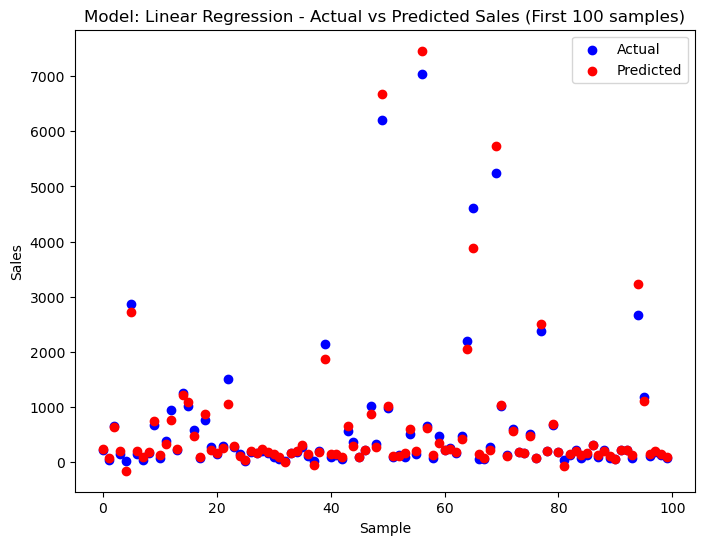

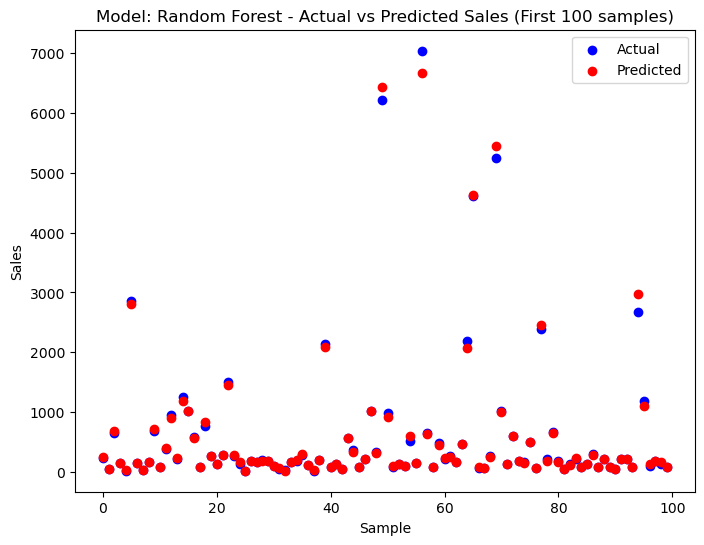

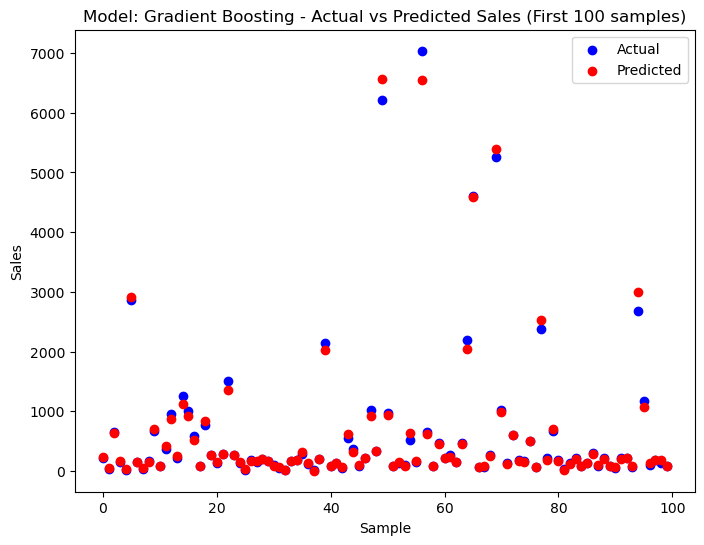

In [26]:
import matplotlib.pyplot as plt

# Graphical comparison for the first 100 samples
for name, model in models.items():
    predictions = model.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(range(100), y_test[:100], color='blue', label='Actual')
    plt.scatter(range(100), predictions[:100], color='red', label='Predicted')
    plt.title(f"Model: {name} - Actual vs Predicted Sales (First 100 samples)")
    plt.xlabel('Sample')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


In [33]:
#from sklearn.coss_validation import train_test_split
from sklearn.model_selection import train_test_split

X = data[selected_features]
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
reg.score(X_test, y_test)

0.9884138486432225

The variable we are predicting is called the criterion variable and is referred to as Y. 
The variable we are basing our predictions on is called the predictor variable and is referred to as X. 
When there is only one predictor variable, the prediction method is called Simple Regression and if multiple predictor variable are present then multiple regression. We use train data and test data , train data to train our machine and test data to see if it has learnt the data well or not.

I’ve made my train data as 80% and 20% of the data to be my test data , and randomized the splitting of data by using random_state. The prediction here is 98.84% accurate.

In [40]:
#gradient boosting
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators= 100, max_depth= 5, min_samples_split=2, learning_rate=0.1, loss = 'squared_error')
clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5)

In [41]:
clf.score(X_test, y_test)

0.9972993263452543